[View in Colaboratory](https://colab.research.google.com/github/MarcChevallier/Machine-Learning/blob/master/Heur%C3%ADstica.ipynb)

<h2>Heurística para Problemas Combinatórios - 2018.2 UNIRIO</h2>

---
  <h3>Heurísticas para TSP</h3>
     
---

#### Importando Pacotes

In [0]:
!pip install --upgrade -q gspread
import pandas as pd #Para trabalhar com DataFrames
import numpy as np #Para trabalhar com Arrays
import matplotlib.pyplot as plt #Para fazer gráficos
import gspread #Para fazer o link com uma planilha do Google Sheets
import math
import time

#### Importando Instâncias

In [0]:
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gc = gspread.authorize(GoogleCredentials.get_application_default())

In [0]:
worksheet = gc.open('Dados Heurística').worksheet('16')
rows = worksheet.get_all_values()
base16 = np.array(rows[1:]).astype(int)

worksheet = gc.open('Dados Heurística').worksheet('26')
rows = worksheet.get_all_values()
base26 = np.array(rows[1:]).astype(int)#Tirar cabeçalho e String

worksheet = gc.open('Dados Heurística').worksheet('36')
rows = worksheet.get_all_values()
base36 = np.array(rows[1:]).astype(int)

worksheet = gc.open('Dados Heurística').worksheet('76')
rows = worksheet.get_all_values()
base76 = np.array(rows[1:]).astype(int)

worksheet = gc.open('Dados Heurística').worksheet('100')
rows = worksheet.get_all_values()
base100 = np.array(rows[1:]).astype(int)

worksheet = gc.open('Dados Heurística').worksheet('200')
rows = worksheet.get_all_values()
base200 = np.array(rows[1:]).astype(int)

worksheet = gc.open('Dados Heurística').worksheet('400')
rows = worksheet.get_all_values()
base400 = np.array(rows[1:]).astype(int)
bases = []
bases = [base16, base26, base36, base76, base100, base200, base400]

In [0]:
def euclidean(x,y,i,j):
    return ((x[i]-x[j])**2 + (y[i]-y[j])**2)**0.5

In [0]:
def prep(base):
  V= [i for i in base[:,0]] #+ [0]
  x= [i for i in base[:,1]]
  #x.append(x[0])
  y= [i for i in base[:,2]]
  #y.append(y[0])
  d= [i for i in base[:,3]]
  return V,x,y

In [0]:
def NN(dados):
  cols = prep(dados)
  V = cols[0]
  x = cols[1]
  y = cols[2]
  n = len(V)
  
  sol = [0]*(n)
  insol = [1]+[0]*(n-1)
  pos = 1
  cor = 0
  custo = 0

  for i in range(n-1):
    dist_min = math.inf
    for j in range(1,n):
      if (j!=cor) and (insol[j]!=1):
        dist= euclidean(x, y, j, cor)
        if dist<dist_min:
            viz = j
            dist_min = dist
    custo = custo + dist_min
    cor=viz
    sol[pos] = viz
    insol[viz] = 1
    pos=pos+1
# dist = entre 0 viz  
  custo = custo + dist
  sol1 = [x for x in sol]
  rota = pd.merge(pd.DataFrame(sol1), pd.DataFrame(dados), on=0, how='left')
  rota = np.array(rota)
  
  return rota

In [0]:
def dois_opt(base):
  custo = 0 
  custo_min = 0
  cols = prep(base)
  V = cols[0] + [0]
  x = cols[1]
  x.append(x[0])
  y = cols[2]
  y.append(y[0])
  
  n = len(V)
  
  s=[i for i in V]
  continua = True
  print(s)
  while continua==True:
    continua=False
    custo_min = math.inf
    for i in range(0, n-2):
      for j in range(i+2,n):
        if not(i== 0 and j==n-1):
          if j==n-1:
            jj=0
          else:
            jj=j+1
          custo =euclidean(x,y,s[i],s[j])+euclidean(x,y,s[jj],s[i+1])-euclidean(x,y,s[i],s[i+1])-euclidean(x,y,s[j],s[jj])
          if custo < custo_min:
            custo_min = custo
            isai =  i
            jsai = j
    if custo_min <0:
      print("i:",isai, s[isai],"j:",jsai,s[jsai])
      temp=s[isai+1]
      s[isai+1]=s[jsai]
      s[jsai]=temp
      print(s)
      continua=True
  
  rota_opt = pd.merge(pd.DataFrame(s), pd.DataFrame(base), on=0, how='left')
  rota_opt = np.array(rota_opt)
  return rota_opt


In [11]:
custo = 0
custos = []
tempos = []
for a in range(len(bases)):
  start_time = time.time()
  cols = prep(bases[a])
  V = cols[0]
  x = cols[1]
  y = cols[2]
  n = len(V)
  
  for j in range(1,n):
    custo = custo + euclidean(x,y,j-1,j)
  
  custo = custo + euclidean(x,y,0,j) 
  custos.append(int(custo))
  tempo = time.time() - start_time
  tempos.append(tempo)
  
print(custos)
print(tempos)

[357, 1089, 1959, 3934, 5999, 10563, 12047]
[0.0001423358917236328, 0.00012445449829101562, 0.00014710426330566406, 0.00035119056701660156, 0.00041294097900390625, 0.0008397102355957031, 0.0015187263488769531]


In [12]:
NN(bases[0])

array([[ 0, 30, 40,  0],
       [12, 31, 32, 29],
       [ 5, 40, 30, 21],
       [11, 42, 41, 19],
       [ 2, 49, 49, 30],
       [ 1, 37, 52,  7],
       [ 8, 31, 62, 23],
       [ 7, 17, 63, 19],
       [ 6, 21, 47, 15],
       [14, 12, 42, 21],
       [ 4, 20, 26,  9],
       [13,  5, 25, 23],
       [15, 36, 16, 10],
       [10, 51, 21,  5],
       [ 9, 52, 33, 11],
       [ 3, 52, 64, 16]])

In [9]:
custo = 0
custos = []
tempos = []
for a in range(len(bases)):
  start_time = time.time()
  cols = prep(NN(bases[a]))
  V = cols[0]
  x = cols[1]
  y = cols[2]
  n = len(V)
  
  for j in range(1,n):
    custo = custo + euclidean(x,y,j-1,j)
  
  custo = custo + euclidean(x,y,0,j) 
  custos.append(int(custo))
  tempo = time.time() - start_time
  tempos.append(tempo)
  
print(custos)
print(tempos)

[260, 644, 1050, 1668, 2476, 3460, 4052]
[0.006967306137084961, 0.0038900375366210938, 0.0048983097076416016, 0.024277687072753906, 0.023081541061401367, 0.07999253273010254, 0.3076059818267822]


In [74]:
custo = 0
custos = []
tempos = []
for a in range(len(bases)):
  start_time = time.time()
  cols = prep(dois_opt(NN(bases[a])))
  V = cols[0]
  x = cols[1]
  y = cols[2]
  n = len(V)
  
  for j in range(1,n):
    custo = custo + euclidean(x,y,j-1,j)
  
  custo = custo + euclidean(x,y,0,j) 
  print(custo)
  custos.append(int(custo))
  tempo = time.time() - start_time
  print(tempo)
  tempos.append(tempo)
  
print(custos)
print(tempos)

375.4407509864986
0.0646204948425293
1101.4876069164634
0.22127103805541992


KeyboardInterrupt: ignored

In [67]:
dois_opt(bases[0])

KeyboardInterrupt: ignored

<h2>Exemplo Caminho Aleatório</h2>


Caminho para cada instância:


[357, 732, 870, 1974, 2064, 4564, 1484]

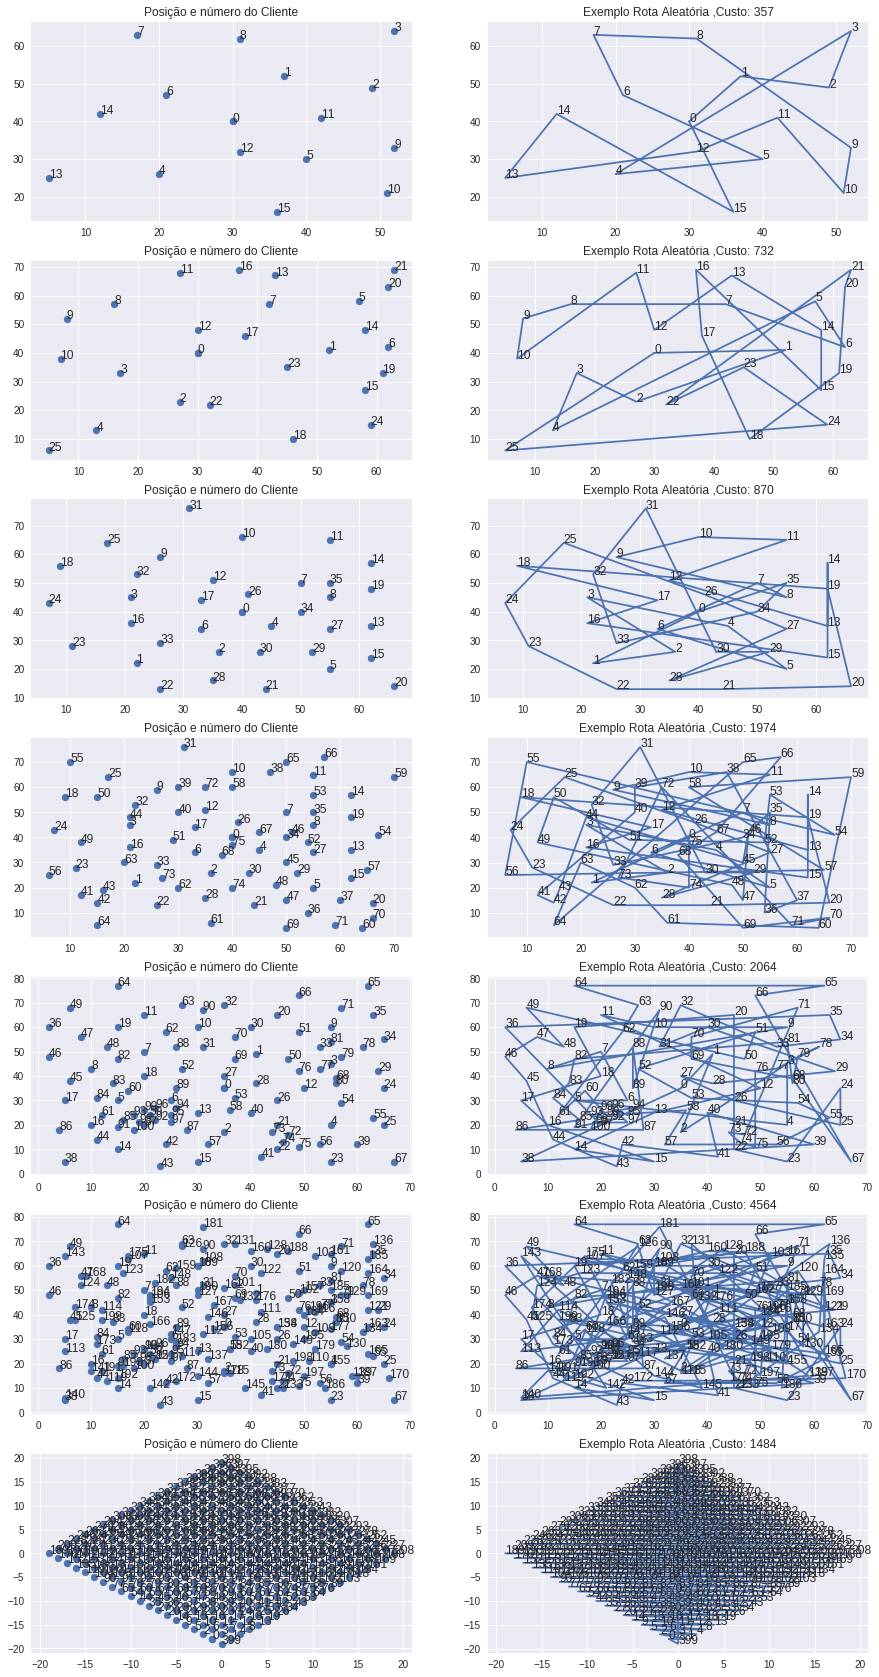

In [24]:
#@title
custos_rnd = []
fig, ax = plt.subplots(7, 2, figsize=(15, 30))
for a in range(len(bases)):
  V= []
  x= []
  y= []
  d= []
  
  V= [i for i in bases[a][:,0]]
  n = len(V)
  x= [i for i in bases[a][:,1]]
  x.append(x[0])
  y= [i for i in bases[a][:,2]]
  y.append(y[0])
  d= [i for i in bases[a][:,3]] 
  
  ax[a,0].scatter(x,y)
  ax[a,1].plot(x,y)
  ax[a,0].set_title("Posição e número do Cliente")
  custo=0
  for j in range(0,n):
    ax[a,0].annotate(V[j], (x[j],y[j]))
    ax[a,1].annotate(V[j], (x[j],y[j]))
  for j in range(1,n):
    custo = custo + euclidean(x,y,j-1,j)
  custo = custo+euclidean(x,y,0,j) 
  ax[a,1].set_title("Exemplo Rota Aleatória ,Custo: "+str(int(custo)))
  custos_rnd.append(int(custo))
  
print('Caminho para cada instância:')
custos_rnd

<h2> Exemplo Neighrest Neighbour </h2>

In [40]:

#  ota = pd.merge(pd.DataFrame(sol1), pd.DataFrame(dados), on=0, how='left')
#  V= np.array(rota[0])
#  x= np.array(rota[1])
#  y= np.array(rota[2])
#  return {'sol':sol, 'custo',custo}
#print(insol)
#print(sol)
#print(custo)
NN(bases[0])

array([[ 0, 30, 40,  0],
       [12, 31, 32, 29],
       [ 5, 40, 30, 21],
       [11, 42, 41, 19],
       [ 2, 49, 49, 30],
       [ 1, 37, 52,  7],
       [ 8, 31, 62, 23],
       [ 7, 17, 63, 19],
       [ 6, 21, 47, 15],
       [14, 12, 42, 21],
       [ 4, 20, 26,  9],
       [13,  5, 25, 23],
       [15, 36, 16, 10],
       [10, 51, 21,  5],
       [ 9, 52, 33, 11],
       [ 3, 52, 64, 16]])

In [73]:
custos = []
for i in range(0,len(bases)):
  df = [bases[i], NNeighbour(bases[i]),NNeighbour(bases[0])]
  df = NNeighbour(bases[i])
  #df = dois_opt(NNeighbour(bases[0]))
  x = [i for i in df[:,1]]
  y = [i for i in df[:,2]]
  n = len(x)
  custo = 0
  for j in range(1,n):
    custo = custo + euclidean(x,y,j-1,j)
  custos.append(custo) 
custos

[260.55971911678716,
 260.55971911678716,
 260.55971911678716,
 260.55971911678716,
 260.55971911678716,
 260.55971911678716,
 260.55971911678716]

**Solução Aleatória teve custo de 332 e com a heurística foi para 260 na instância 1**

Caminho para cada instância:


[260, 383, 405, 617, 808, 984, 591]

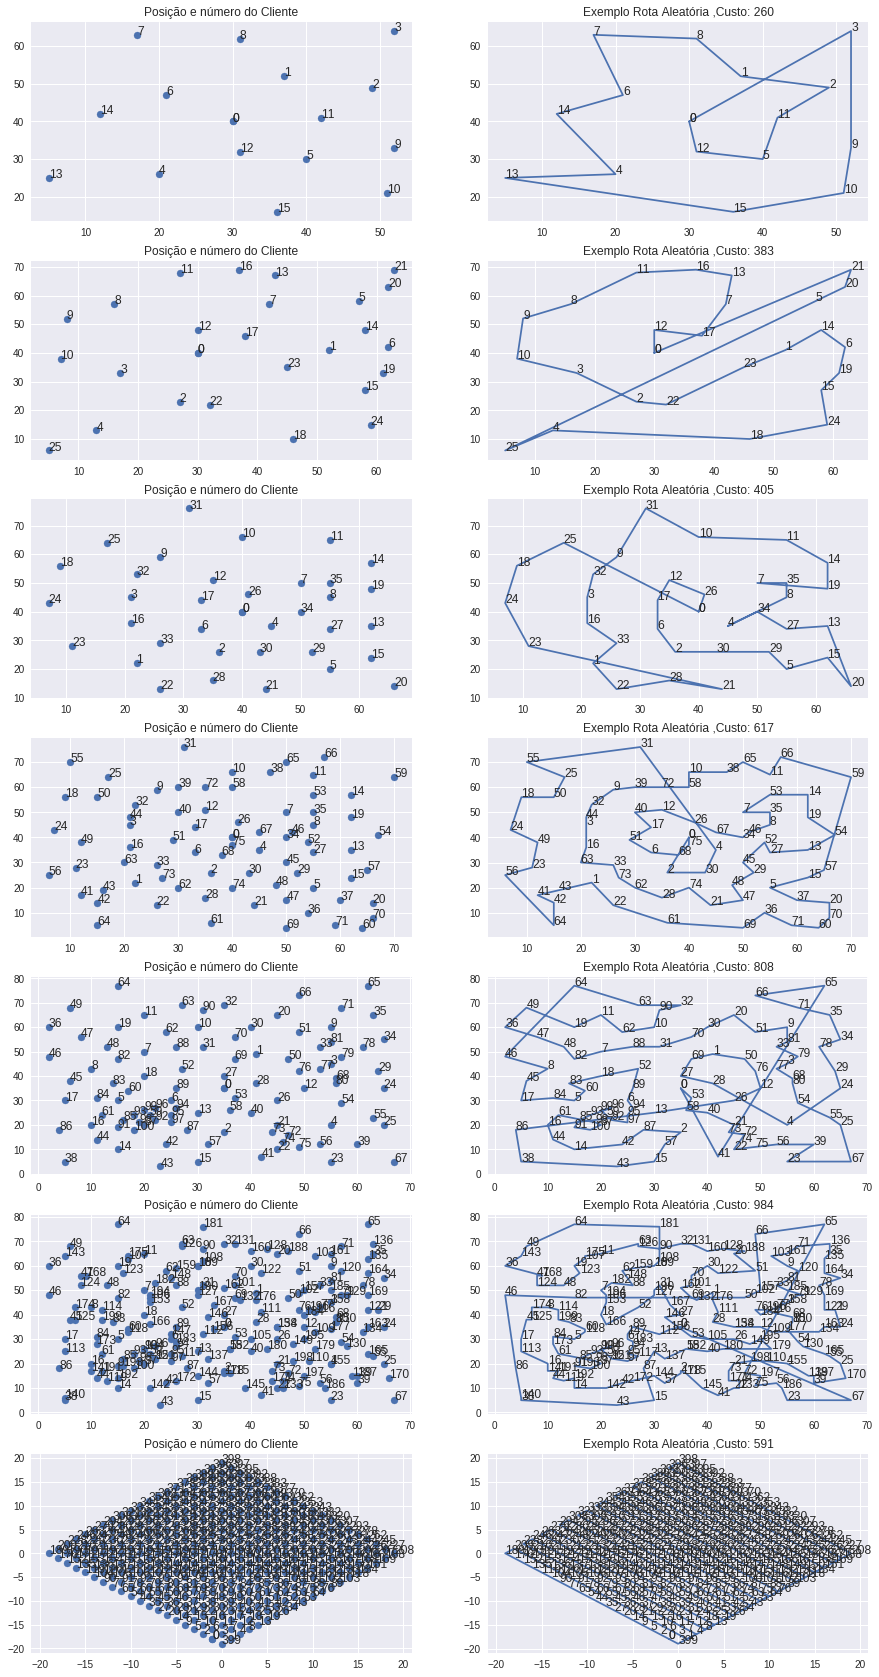

In [26]:
#@title
custos = []
fig, ax = plt.subplots(7, 2, figsize=(15, 30))
for a in range(len(bases)):
  V= []
  x= []
  y= []
  x1= []
  y1= []
  n=0
#  d= []
  
  V= [i for i in NNeighbour(bases[a])]
  n = len(V)*1
  x = []
  x1= [i for i in bases[a][:,1]]
  x1.append(x1[0])
  y1= [i for i in bases[a][:,2]]
  y1.append(y1[0])

  x = [x1[i] for i in V]

  y = [y1[i] for i in V]

#  d= [i for i in bases[a][:,3]]
  
  ax[a,0].scatter(x,y)
  ax[a,1].plot(x,y)
  ax[a,0].set_title("Posição e número do Cliente")
  custo=0
  for j in range(0,n):
    ax[a,0].annotate(V[j], (x[j],y[j]))
    ax[a,1].annotate(V[j], (x[j],y[j]))
  for j in range(1,n):
    custo = custo + euclidean(x,y,j-1,j)
  custo = custo+euclidean(x,y,0,j) 
  ax[a,1].set_title("Exemplo Rota Aleatória ,Custo: "+str(int(custo)))
  custos.append(int(custo))
print('Caminho para cada instância:')
custos

<h2> Exemplo 2 Opt </h2>

In [0]:
s=[i for i in sol]
s

[0, 12, 5, 11, 2, 1, 8, 7, 6, 14, 4, 13, 15, 10, 9, 3]

In [0]:

def dois_opt(base):
  custo = 0 
  custo_min = 0
  cols = prep(base)
  V = cols[0] + [0]
  x = cols[1]
  x.append(x[0])
  y = cols[2]
  y.append(y[0])
  n = len(V)
  
  s=[i for i in V]
  continua = True
  print(s)
  while continua==True:
    continua=False
    custo_min = math.inf
    for i in range(0, n-2):
      for j in range(i+2,n):
        if not(i== 0 and j==n-1):
          if j==n-1:
            jj=0
          else:
            jj=j+1
          custo =euclidean(x,y,s[i],s[j])+euclidean(x,y,s[jj],s[i+1])-euclidean(x,y,s[i],s[i+1])-euclidean(x,y,s[j],s[jj])
          if custo < custo_min:
            custo_min = custo
            isai =  i
            jsai = j
    if custo_min <0:
      print("i:",isai, s[isai],"j:",jsai,s[jsai])
      temp=s[isai+1]
      s[isai+1]=s[jsai]
      s[jsai]=temp
      print(s)
      continua=True
  
  rota_opt = pd.merge(pd.DataFrame(s), pd.DataFrame(base), on=0, how='left')
  rota_opt = np.array(rota_opt)
  return rota_opt

dois_opt(NN(bases[5]))

In [157]:
len(dois_opt(bases[0]))

17

Caminho para cada instância:


[302, 427, 484, 752, 823, 1052, 593]

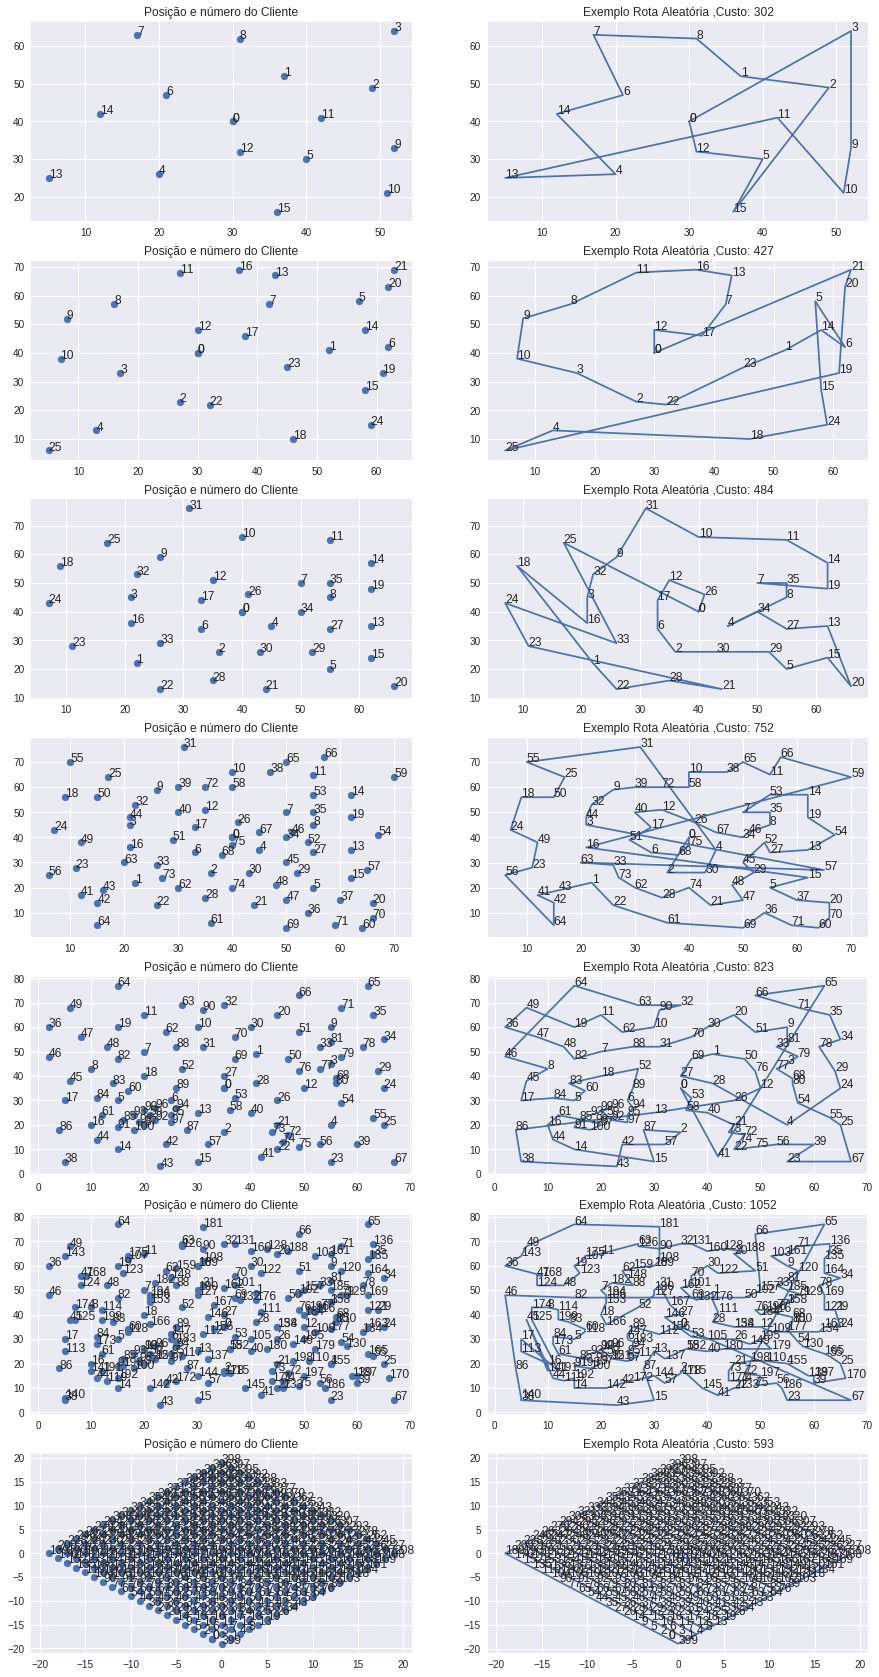

In [180]:
#@title
custos = []
fig, ax = plt.subplots(7, 2, figsize=(15, 30))
for a in range(len(bases)):
  V= []
  x= []
  y= []
#  d= []
  
  V= [i for i in dois_opt(bases[a])]
  n = len(V)
  x = []
  x1= [i for i in bases[a][:,1]]
  x = [x1[V[i]] for i in range(n)]
  y1= [i for i in bases[a][:,2]]
  y = [y1[V[i]] for i in range(n)]
#  d= [i for i in bases[a][:,3]]
  
  ax[a,0].scatter(x,y)
  ax[a,1].plot(x,y)
  ax[a,0].set_title("Posição e número do Cliente")
  custo=0
  for j in range(0,n):
    ax[a,0].annotate(V[j], (x[j],y[j]))
    ax[a,1].annotate(V[j], (x[j],y[j]))
  for j in range(1,n):
    custo = custo + euclidean(x,y,j-1,j)
  ax[a,1].set_title("Exemplo Rota Aleatória ,Custo: "+str(int(custo)))
  custos.append(int(custo))
print('Caminho para cada instância:')
custos

In [0]:
#fazer várias instâncias
#fazer o custo por dois metodos (subtração e soma do 0)
#instância / aleatória/NB/2pt
#exemplos de como pode comparar
custo_2opt = 0
for i in range(0,n-1):
  custo_2opt =   custo_2opt + euclidean(x,y,sol[i],sol[i+1])
custo_2opt = custo_2opt + euclidean(x,y,sol[n-1],sol[0])
custo_2opt

260.55971911678716

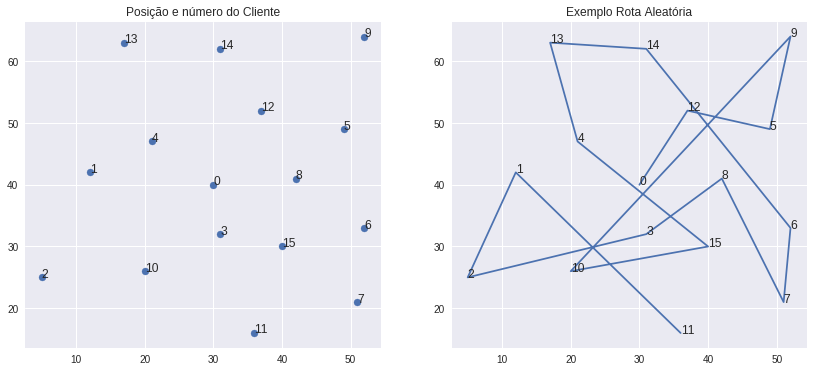

In [0]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

ax[0].scatter(x,y)
for i in range(0,n):
  ax[0].annotate(s[i], (x[i],y[i]))
ax[0].set_title("Posição e número do Cliente")

ax[1].plot(x,y)
for i in range(0,n):
    ax[1].annotate(s[i], (x[i],y[i]))
ax[1].set_title("Exemplo Rota Aleatória");


In [0]:
i = 0
j = 1
custo =euclidean(x,y,sol[i],sol[j])+euclidean(x,y,sol[j+1],sol[i+1])-euclidean(x,y,sol[i],sol[i+1])-euclidean(x,y,sol[j],sol[j+1])
custo
print(sol)
print(n)

[0, 12, 5, 11, 2, 1, 8, 7, 6, 14, 4, 13, 15, 10, 9, 3]
16


**Progredindo para um modelo de VRP**


*   $n$ is the number of clients
*   $N$ is set of clients, with $N = \{ 1,2,...,n\}$

*   $V$ is set of vertices (or nodes), with $V = \{0\} \cup N$ 
* $A$ is a set of arcs, with $A= \{(i,j) \in V^2: i \ne j\}$

* $c_{i,j}$ is cost of travel over arc $(i,j) \in A$

* $Q$ is the vehicule capacity

* $q_{i}$ is the amount that has to be delivered to customer $i \in N$

In [0]:
N = V[1:]
n = len(N)
V = V
A = [(i,j) for i in V for j in V if i!=j]
c = {(i,j): np.hypot(x[i]-x[j],y[i]-y[j]) for i,j in A}
Q=90
q = {i: d[i] for i in N}

print(N)
print(V)
print(x)
print(y)
print(q)
print(A)
print(c)

Then, the formulation is the following

>$min\sum_{i,j\in A}c_{ij}x_{ij}$

>subject to:


>$\sum _{i\in V, i \ne j}x_{ij}=1\quad \quad j\in N$

>$\sum _{j\in V,j \ne i}x_{ij}=1\quad \quad i\in N$

>if $x_{ij} = 1 \Longrightarrow u_{i} + q_{1} = u_{i} \quad i,j\in A : j \ne 0, i \ne 0 $


>$q_{i}\leq u_{i}\leq Q\quad \forall i\in N$

>$x_{i,j} \in {0,1}$



 

 

 

 
 

In [0]:
!pip install docplex;
from docplex.mp.model import Model

In [0]:
mdl = Model('CVRP')
x = mdl.binary_var_dict(A, name='x')
u = mdl.continuous_var_dict(N, ub=Q, name='u') 
mdl.minimize(mdl.sum(c[i,j]*x[i,j] for i,j in A))
mdl.add_constraints(mdl.sum(x[i,j] for j in V if j!=i)==1 for i in N)
mdl.add_constraints(mdl.sum(x[i,j] for i in V if i!=j)==1 for j in N)
mdl.add_indicator_constraints(mdl.indicator_constraint(x[i,j],u[i]+q[j]==u[j]))
#mdl.add_indicator_constraints(mdl.indicator_constraints(x[i,j],u[i]+q[j]==u[j]) for i,j in A if i!=0 and j!=0)
#mdl.add_constraints(u[i]>=q[i] for i in N)
#solution = mdl.solve(log_output=True)

TypeError: ignored

In [0]:


rnd = np.random
rnd.seed(0)

In [0]:
n = len(client)-1 #15 clientes e um depósito
N =client[1:] #array com o nome dos clientes
V = client
Q = 90 # capacidade do veículo
q = {i:dados[:,3][i] for  i in N} #dicionário com o nome dos clientes

NameError: ignored

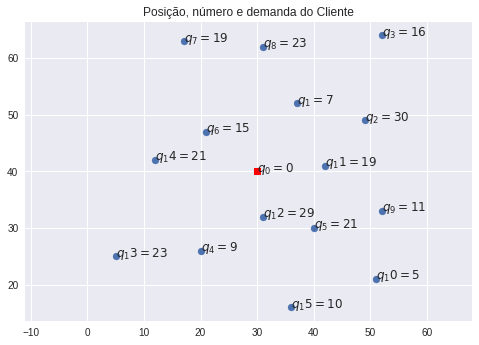

In [0]:
#@title
plt.scatter(x,y)
plt.title("Posição, número e demanda do Cliente")
for i in N:
  plt.annotate('$q_%d=%d$'%(N[i],q[i]), (x[i],y[i]))
plt.plot(x[0],y[0], c='r', marker='s') 
plt.axis('equal');

In [0]:
A =[(i,j) for i in]

NameError: ignored

In [0]:
from math import sqrt

cords = {}
cords['Boston'] = (5, 2)
cords['Phoenix'] = (7, 3)
cords['New York'] = (8, 1)

def dist(a, b):
    d = [a[0] - b[0], a[1] - b[1]]
    return sqrt(d[0] * d[0] + d[1] * d[1]) 

D = {}

for city1, cords1 in cords.items():
    D[city1] = {}
    for city2, cords2 in cords.items():
        D[city1][city2] = dist(cords1, cords2)   

for city1, v in D.items():
    for city2, d in v.items():
        print (city1, city2, d)

Boston Boston 0.0
Boston Phoenix 2.23606797749979
Boston New York 3.1622776601683795
Phoenix Boston 2.23606797749979
Phoenix Phoenix 0.0
Phoenix New York 2.23606797749979
New York Boston 3.1622776601683795
New York Phoenix 2.23606797749979
New York New York 0.0


In [0]:
cords

{'Boston': (5, 2), 'New York': (8, 1), 'Phoenix': (7, 3)}

In [0]:
"""Vehicle Routing Problem"""
from __future__ import print_function
from six.moves import xrange
from ortools.constraint_solver import pywrapcp
from ortools.constraint_solver import routing_enums_pb2

###########################
# Problem Data Definition #
###########################
class CityBlock():
    """City block definition"""
    @property
    def width(self):
        """Gets Block size West to East"""
        return 228/2

    @property
    def height(self):
        """Gets Block size North to South"""
        return 80

class DataProblem():
    """Stores the data for the problem"""
    def __init__(self):
        """Initializes the data for the problem"""
        self._num_vehicles = 4

        # Locations in block unit
        locations = \
                [(4, 4), # depot
                 (2, 0), (8, 0), # row 0
                 (0, 1), (1, 1),
                 (5, 2), (7, 2),
                 (3, 3), (6, 3),
                 (5, 5), (8, 5),
                 (1, 6), (2, 6),
                 (3, 7), (6, 7),
                 (0, 8), (7, 8)]
        # locations in meters using the city block dimension
        city_block = CityBlock()
        self._locations = [(
            loc[0]*city_block.width,
            loc[1]*city_block.height) for loc in locations]

        self._depot = 0

    @property
    def num_vehicles(self):
        """Gets number of vehicles"""
        return self._num_vehicles

    @property
    def locations(self):
        """Gets locations"""
        return self._locations

    @property
    def num_locations(self):
        """Gets number of locations"""
        return len(self.locations)

    @property
    def depot(self):
        """Gets depot location index"""
        return self._depot

#######################
# Problem Constraints #
#######################
def manhattan_distance(position_1, position_2):
    """Computes the Manhattan distance between two points"""
    return (abs(position_1[0] - position_2[0]) +
            abs(position_1[1] - position_2[1]))

class CreateDistanceEvaluator(object): # pylint: disable=too-few-public-methods
    """Creates callback to return distance between points."""
    def __init__(self, data):
        """Initializes the distance matrix."""
        self._distances = {}

        # precompute distance between location to have distance callback in O(1)
        for from_node in xrange(data.num_locations):
            self._distances[from_node] = {}
            for to_node in xrange(data.num_locations):
                if from_node == to_node:
                    self._distances[from_node][to_node] = 0
                else:
                    self._distances[from_node][to_node] = (
                        manhattan_distance(
                            data.locations[from_node],
                            data.locations[to_node]))

    def distance_evaluator(self, from_node, to_node):
        """Returns the manhattan distance between the two nodes"""
        return self._distances[from_node][to_node]

def add_distance_dimension(routing, distance_evaluator):
    """Add Global Span constraint"""
    distance = "Distance"
    maximum_distance = 3000
    routing.AddDimension(
        distance_evaluator,
        0, # null slack
        maximum_distance, # maximum distance per vehicle
        True, # start cumul to zero
        distance)
    distance_dimension = routing.GetDimensionOrDie(distance)
    # Try to minimize the max distance among vehicles.
    # /!\ It doesn't mean the standard deviation is minimized
    distance_dimension.SetGlobalSpanCostCoefficient(100)

###########
# Printer #
###########
class ConsolePrinter():
    """Print solution to console"""
    def __init__(self, data, routing, assignment):
        """Initializes the printer"""
        self._data = data
        self._routing = routing
        self._assignment = assignment

    @property
    def data(self):
        """Gets problem data"""
        return self._data

    @property
    def routing(self):
        """Gets routing model"""
        return self._routing

    @property
    def assignment(self):
        """Gets routing model"""
        return self._assignment

    def print(self):
        """Prints assignment on console"""
        # Inspect solution.
        total_dist = 0
        for vehicle_id in xrange(self.data.num_vehicles):
            index = self.routing.Start(vehicle_id)
            plan_output = 'Route for vehicle {0}:\n'.format(vehicle_id)
            route_dist = 0
            while not self.routing.IsEnd(index):
                node_index = self.routing.IndexToNode(index)
                next_node_index = self.routing.IndexToNode(
                    self.assignment.Value(self.routing.NextVar(index)))
                route_dist += manhattan_distance(
                    self.data.locations[node_index],
                    self.data.locations[next_node_index])
                plan_output += ' {node_index} -> '.format(
                    node_index=node_index)
                index = self.assignment.Value(self.routing.NextVar(index))

            node_index = self.routing.IndexToNode(index)
            total_dist += route_dist
            plan_output += ' {node_index}\n'.format(
                node_index=node_index)
            plan_output += 'Distance of the route {0}: {dist}\n'.format(
                vehicle_id,
                dist=route_dist)
            print(plan_output)
        print('Total Distance of all routes: {dist}'.format(dist=total_dist))

########
# Main #
########
def main():
    """Entry point of the program"""
    # Instantiate the data problem.
    data = DataProblem()

    # Create Routing Model
    routing = pywrapcp.RoutingModel(data.num_locations, data.num_vehicles, data.depot)
    # Define weight of each edge
    distance_evaluator = CreateDistanceEvaluator(data).distance_evaluator
    routing.SetArcCostEvaluatorOfAllVehicles(distance_evaluator)
    add_distance_dimension(routing, distance_evaluator)

    # Setting first solution heuristic (cheapest addition).
    search_parameters = pywrapcp.RoutingModel.DefaultSearchParameters()
    search_parameters.first_solution_strategy = (
        routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)
    # Solve the problem.
    assignment = routing.SolveWithParameters(search_parameters)
    printer = ConsolePrinter(data, routing, assignment)
    printer.print()

if __name__ == '__main__':
  main()

Route for vehicle 0:
 0 ->  8 ->  6 ->  2 ->  5 ->  0
Distance of the route 0: 1552.0

Route for vehicle 1:
 0 ->  7 ->  1 ->  4 ->  3 ->  0
Distance of the route 1: 1552.0

Route for vehicle 2:
 0 ->  9 ->  10 ->  16 ->  14 ->  0
Distance of the route 2: 1552.0

Route for vehicle 3:
 0 ->  12 ->  11 ->  15 ->  13 ->  0
Distance of the route 3: 1552.0

Total Distance of all routes: 6208.0


In [0]:
"""Capacitated Vehicle Routing Problem"""
from __future__ import print_function
from six.moves import xrange
from ortools.constraint_solver import pywrapcp
from ortools.constraint_solver import routing_enums_pb2

###########################
# Problem Data Definition #
###########################
class Vehicle():
    """Stores the property of a vehicle"""
    def __init__(self):
        """Initializes the vehicle properties"""
        self._capacity = 15

    @property
    def capacity(self):
        """Gets vehicle capacity"""
        return self._capacity

class CityBlock():
    """City block definition"""
    @property
    def width(self):
        """Gets Block size West to East"""
        return 228/2

    @property
    def height(self):
        """Gets Block size North to South"""
        return 80

class DataProblem():
    """Stores the data for the problem"""
    def __init__(self):
        """Initializes the data for the problem"""
        self._vehicle = Vehicle()
        self._num_vehicles = 4

        # Locations in block unit
        locations = \
                [(4, 4), # depot
                 (2, 0), (8, 0), # row 0
                 (0, 1), (1, 1),
                 (5, 2), (7, 2),
                 (3, 3), (6, 3),
                 (5, 5), (8, 5),
                 (1, 6), (2, 6),
                 (3, 7), (6, 7),
                 (0, 8), (7, 8)]
        # locations in meters using the city block dimension
        city_block = CityBlock()
        self._locations = [(
            loc[0]*city_block.width,
            loc[1]*city_block.height) for loc in locations]

        self._depot = 0

        self._demands = \
            [0, # depot
             1, 1, # row 0
             2, 4,
             2, 4,
             8, 8,
             1, 2,
             1, 2,
             4, 4,
             8, 8]

    @property
    def vehicle(self):
        """Gets a vehicle"""
        return self._vehicle

    @property
    def num_vehicles(self):
        """Gets number of vehicles"""
        return self._num_vehicles

    @property
    def locations(self):
        """Gets locations"""
        return self._locations

    @property
    def num_locations(self):
        """Gets number of locations"""
        return len(self.locations)

    @property
    def depot(self):
        """Gets depot location index"""
        return self._depot

    @property
    def demands(self):
        """Gets demands at each location"""
        return self._demands

#######################
# Problem Constraints #
#######################
def manhattan_distance(position_1, position_2):
    """Computes the Manhattan distance between two points"""
    return (abs(position_1[0] - position_2[0]) +
            abs(position_1[1] - position_2[1]))

class CreateDistanceEvaluator(object): # pylint: disable=too-few-public-methods
    """Creates callback to return distance between points."""
    def __init__(self, data):
        """Initializes the distance matrix."""
        self._distances = {}

        # precompute distance between location to have distance callback in O(1)
        for from_node in xrange(data.num_locations):
            self._distances[from_node] = {}
            for to_node in xrange(data.num_locations):
                if from_node == to_node:
                    self._distances[from_node][to_node] = 0
                else:
                    self._distances[from_node][to_node] = (
                        manhattan_distance(
                            data.locations[from_node],
                            data.locations[to_node]))

    def distance_evaluator(self, from_node, to_node):
        """Returns the manhattan distance between the two nodes"""
        return self._distances[from_node][to_node]

class CreateDemandEvaluator(object): # pylint: disable=too-few-public-methods
    """Creates callback to get demands at each location."""
    def __init__(self, data):
        """Initializes the demand array."""
        self._demands = data.demands

    def demand_evaluator(self, from_node, to_node):
        """Returns the demand of the current node"""
        del to_node
        return self._demands[from_node]

def add_capacity_constraints(routing, data, demand_evaluator):
    """Adds capacity constraint"""
    capacity = "Capacity"
    routing.AddDimension(
        demand_evaluator,
        0, # null capacity slack
        data.vehicle.capacity, # vehicle maximum capacity
        True, # start cumul to zero
        capacity)

###########
# Printer #
###########
class ConsolePrinter():
    """Print solution to console"""
    def __init__(self, data, routing, assignment):
        """Initializes the printer"""
        self._data = data
        self._routing = routing
        self._assignment = assignment

    @property
    def data(self):
        """Gets problem data"""
        return self._data

    @property
    def routing(self):
        """Gets routing model"""
        return self._routing

    @property
    def assignment(self):
        """Gets routing model"""
        return self._assignment

    def print(self):
        """Prints assignment on console"""
        # Inspect solution.
        total_dist = 0
        for vehicle_id in xrange(self.data.num_vehicles):
            index = self.routing.Start(vehicle_id)
            plan_output = 'Route for vehicle {0}:\n'.format(vehicle_id)
            route_dist = 0
            route_load = 0
            while not self.routing.IsEnd(index):
                node_index = self.routing.IndexToNode(index)
                next_node_index = self.routing.IndexToNode(
                    self.assignment.Value(self.routing.NextVar(index)))
                route_dist += manhattan_distance(
                    self.data.locations[node_index],
                    self.data.locations[next_node_index])
                route_load += self.data.demands[node_index]
                plan_output += ' {0} Load({1}) -> '.format(node_index, route_load)
                index = self.assignment.Value(self.routing.NextVar(index))

            node_index = self.routing.IndexToNode(index)
            total_dist += route_dist
            plan_output += ' {0} Load({1})\n'.format(node_index, route_load)
            plan_output += 'Distance of the route: {0}m\n'.format(route_dist)
            plan_output += 'Load of the route: {0}\n'.format(route_load)
            print(plan_output)
        print('Total Distance of all routes: {0}m'.format(total_dist))

########
# Main #
########
def main():
    """Entry point of the program"""
    # Instantiate the data problem.
    data = DataProblem()

    # Create Routing Model
    routing = pywrapcp.RoutingModel(data.num_locations, data.num_vehicles, data.depot)
    # Define weight of each edge
    distance_evaluator = CreateDistanceEvaluator(data).distance_evaluator
    routing.SetArcCostEvaluatorOfAllVehicles(distance_evaluator)
    # Add Capacity constraint
    demand_evaluator = CreateDemandEvaluator(data).demand_evaluator
    add_capacity_constraints(routing, data, demand_evaluator)

    # Setting first solution heuristic (cheapest addition).
    search_parameters = pywrapcp.RoutingModel.DefaultSearchParameters()
    search_parameters.first_solution_strategy = (
        routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)
    # Solve the problem.
    assignment = routing.SolveWithParameters(search_parameters)
    printer = ConsolePrinter(data, routing, assignment)
    printer.print()

if __name__ == '__main__':
  main()

In [0]:
https://www.youtube.com/watch?v=enCBp2lBn64
https://developers.google.com/optimization/routing/cvrp
  